In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data manipulation library
import numpy as np
import pandas as pd

#Import data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#Import Statistics library
from scipy import stats
import statsmodels.api as sm

#Import modelling library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score

#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#As per respective team members drive path
#df = pd.read_csv('/content/drive/MyDrive/Lead scoring /Leads.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Main Files/Case Study - Lead Scoring/Leads.csv')

In [ ]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
df.shape

(9240, 37)

In [ ]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
#Calculating null value for each column
round(df.isnull().sum()/len(df) * 100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [ ]:
# As mentioned in case study details
# Categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value
df = df.replace('select',np.nan)

In [ ]:
#Calculating null value for each column
round(df.isnull().sum()/len(df) * 100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [ ]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [ ]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Deleting as null value >=30% & varaiable not important for the model

drop_list_30percent_null = ['Last Activity', 'What matters most to you in choosing a course', 'Tags',
                      'Lead Quality','Lead Profile', 'Asymmetrique Activity Index',
                      'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score',
                     ]

# Deleting column with only one unique value
drop_list_unique_value = ['Magazine', 'Receive More Updates About Our Courses', 'Get updates on DM Content',
                          'Update me on Supply Chain Content','I agree to pay the amount through cheque'
                         ]

#Deleting column with not much relevance to the model
drop_list_no_relevance = [ 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']

drop_list = drop_list_30percent_null + drop_list_unique_value + drop_list_no_relevance

drop_list

['Last Activity',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'I agree to pay the amount through cheque',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [ ]:
# Dropping the selected columns
df = df.drop(drop_list, axis = 1)

In [ ]:
df.shape

(9240, 20)

In [ ]:
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Prospect ID                         9240 non-null   object 
 1   Lead Number                         9240 non-null   int64  
 2   Lead Origin                         9240 non-null   object 
 3   Lead Source                         9204 non-null   object 
 4   Do Not Email                        9240 non-null   object 
 5   Do Not Call                         9240 non-null   object 
 6   Converted                           9240 non-null   int64  
 7   TotalVisits                         9103 non-null   float64
 8   Total Time Spent on Website         9240 non-null   int64  
 9   Page Views Per Visit                9103 non-null   float64
 10  Country                             6779 non-null   object 
 11  Specialization                      7802 no

In [ ]:
round(df.isnull().sum()/len(df) * 100,2)

Prospect ID                            0.00
Lead Number                            0.00
Lead Origin                            0.00
Lead Source                            0.39
Do Not Email                           0.00
Do Not Call                            0.00
Converted                              0.00
TotalVisits                            1.48
Total Time Spent on Website            0.00
Page Views Per Visit                   1.48
Country                               26.63
Specialization                        15.56
How did you hear about X Education    23.89
What is your current occupation       29.11
Search                                 0.00
Newspaper Article                      0.00
X Education Forums                     0.00
Newspaper                              0.00
Digital Advertisement                  0.00
Through Recommendations                0.00
dtype: float64

In [ ]:
# Dropping the null values from TotalVisits
df = df [ ~(df['TotalVisits'].isnull()) ]

In [ ]:
round(df.isnull().sum()/len(df) * 100,2)

Prospect ID                            0.00
Lead Number                            0.00
Lead Origin                            0.00
Lead Source                            0.32
Do Not Email                           0.00
Do Not Call                            0.00
Converted                              0.00
TotalVisits                            0.00
Total Time Spent on Website            0.00
Page Views Per Visit                   0.00
Country                               25.53
Specialization                        15.72
How did you hear about X Education    24.17
What is your current occupation       29.47
Search                                 0.00
Newspaper Article                      0.00
X Education Forums                     0.00
Newspaper                              0.00
Digital Advertisement                  0.00
Through Recommendations                0.00
dtype: float64

In [ ]:
# Dropping the null values from Lead Source
df = df [ ~(df['Lead Source'].isnull()) ]

In [ ]:
round(df.isnull().sum()/len(df) * 100,2)

Prospect ID                            0.00
Lead Number                            0.00
Lead Origin                            0.00
Lead Source                            0.00
Do Not Email                           0.00
Do Not Call                            0.00
Converted                              0.00
TotalVisits                            0.00
Total Time Spent on Website            0.00
Page Views Per Visit                   0.00
Country                               25.30
Specialization                        15.77
How did you hear about X Education    24.25
What is your current occupation       29.57
Search                                 0.00
Newspaper Article                      0.00
X Education Forums                     0.00
Newspaper                              0.00
Digital Advertisement                  0.00
Through Recommendations                0.00
dtype: float64

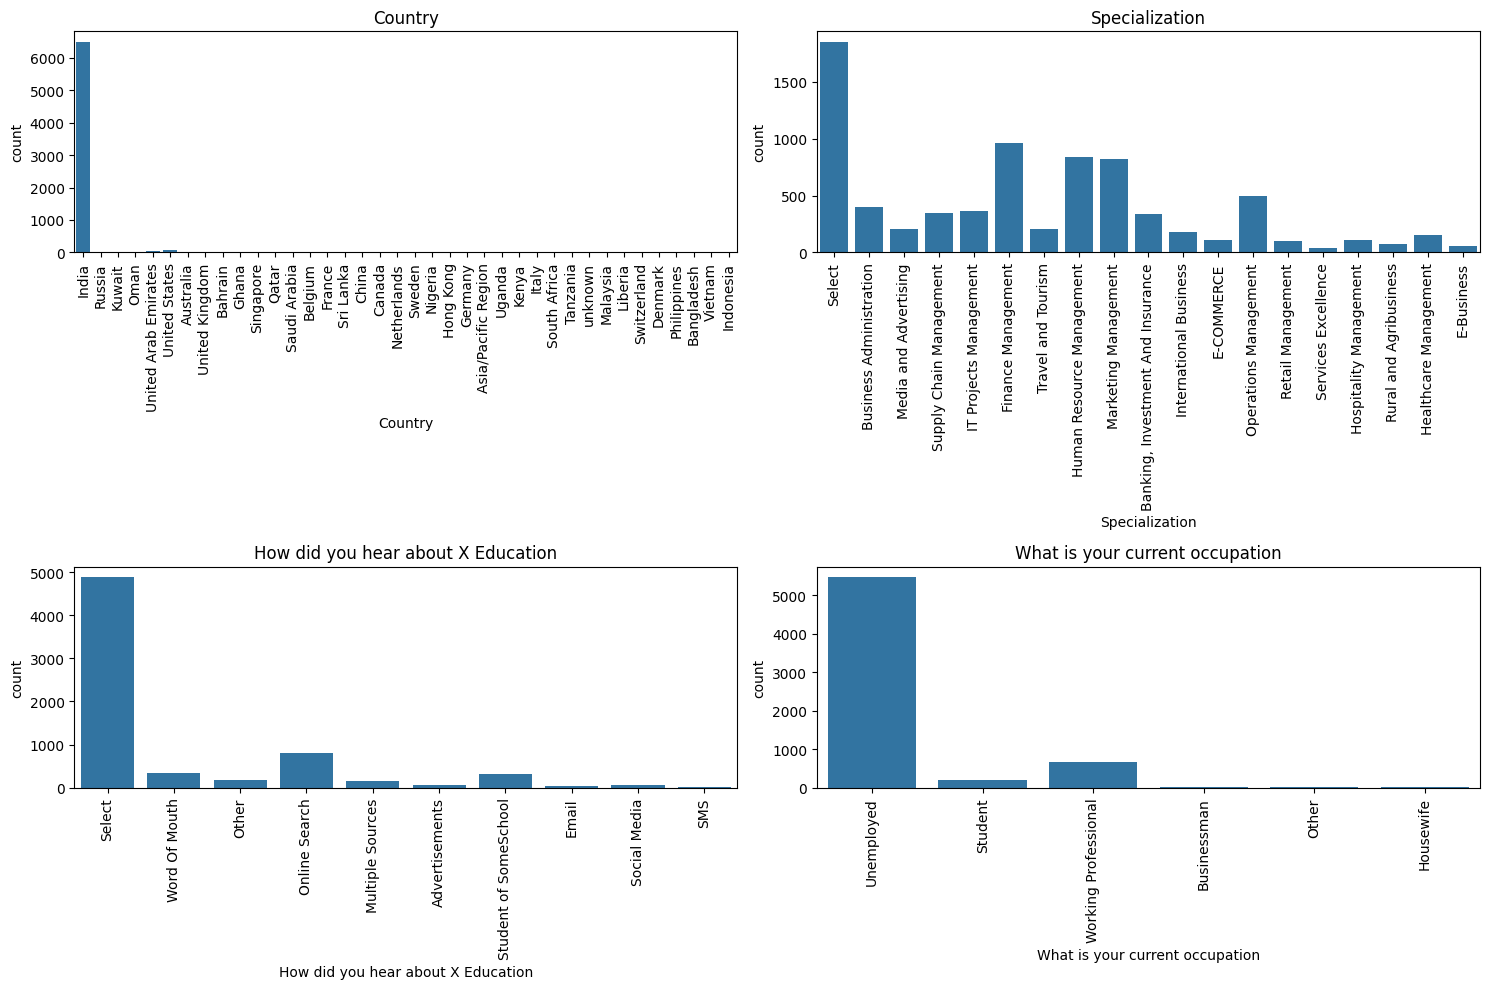

In [ ]:
#Plotting spread of remaining columns with null values

data_null_values =['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation']

a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 10))

for i in data_null_values:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=df)
    plt.xticks(rotation=90)
    c = c + 1

fig.tight_layout()
plt.show()

In [ ]:
#There are 71% of data from India only. This variable will not be relevant for modelling. it can be dropped
df['Country'].value_counts()/len(df['Country'])*100

Country
India                   71.534053
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Hong Kong                0.077143
Bahrain                  0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
South Africa             0.044082
Nigeria                  0.044082
Germany                  0.044082
Kuwait                   0.044082
Canada                   0.044082
Sweden                   0.033061
China                    0.022041
Asia/Pacific Region      0.022041
Uganda                   0.022041
Bangladesh               0.022041
Italy                    0.022041
Belgium                  0.022041
Netherlands              0.022041
Ghana                    0.022041
Philippines              0.022041
Russia                   0.011020
Switze

In [ ]:
# Replacing null values & Select in specialization with 'No Selection'
df.Specialization = df.Specialization.replace ([ np.nan, 'Select' ] , 'No Selection')

#Merging all the similar courses of management into 'Management Specialization'
df.Specialization = df.Specialization.replace ([ 'Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Hospitality Management', 'Supply Chain Management', 'Healthcare Management', 'Retail Management'   ], 'Management Specialization')

#Merging E-business & E-Commerce into 'E-Commerce' as it means the same
df.Specialization = df.Specialization.replace ([ 'E-COMMERCE', 'E-Business' ] , 'E-Commerce')


#There are 36% 'No selection'.
df['Specialization'].value_counts()/len(df['Specialization'])*100

Specialization
Management Specialization            46.253031
No Selection                         36.169275
Business Administration               4.397179
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
International Business                1.939608
E-Commerce                            1.851444
Rural and Agribusiness                0.804496
Services Excellence                   0.440820
Name: count, dtype: float64

In [ ]:
# Replacing null values & Select in  with 'How did you hear about X Education' with 'No Selection'
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace ([ np.nan, 'Select' ] , 'No Selection')

#There are 78% 'No selection'. This column can be dropped
df['How did you hear about X Education'].value_counts()/len(df['How did you hear about X Education'])*100

How did you hear about X Education
No Selection             78.091250
Online Search             8.904562
Word Of Mouth             3.824113
Student of SomeSchool     3.416354
Other                     2.049813
Multiple Sources          1.675116
Advertisements            0.771435
Social Media              0.727353
Email                     0.286533
SMS                       0.253471
Name: count, dtype: float64

In [ ]:
#Replacing null values in 'What is your current occupation', with the 'Unemployed' as it is the most occuring value in the column
df['What is your current occupation'] = df['What is your current occupation'].replace ([ np.nan, 'Select' ] , 'Unemployed')



#The high percentage of unemployed individuals in dataset presents an opportunity for businesses to tailor their products or services to meet the needs of this demographic. By understanding the challenges faced by the unemployed, businesses can develop solutions such as career development programs, job placement services, or affordable skill-building courses.



#There are 90% of the people are 'Unemployed'. This column can be dropped as it is not relevant for modelling
df['What is your current occupation'].value_counts()/len(df['What is your current occupation'])*100

What is your current occupation
Unemployed              89.916244
Working Professional     7.460877
Student                  2.270223
Other                    0.165307
Housewife                0.099184
Businessman              0.088164
Name: count, dtype: float64

In [ ]:
#Final columns to drop
drop_list_update = [ 'Country', 'How did you hear about X Education']
# Dropping the selected columns
df = df.drop(drop_list_update, axis = 1)

In [ ]:
df.shape

(9074, 18)

In [ ]:
#No null values are present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Number                      9074 non-null   int64  
 2   Lead Origin                      9074 non-null   object 
 3   Lead Source                      9074 non-null   object 
 4   Do Not Email                     9074 non-null   object 
 5   Do Not Call                      9074 non-null   object 
 6   Converted                        9074 non-null   int64  
 7   TotalVisits                      9074 non-null   float64
 8   Total Time Spent on Website      9074 non-null   int64  
 9   Page Views Per Visit             9074 non-null   float64
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Search                   

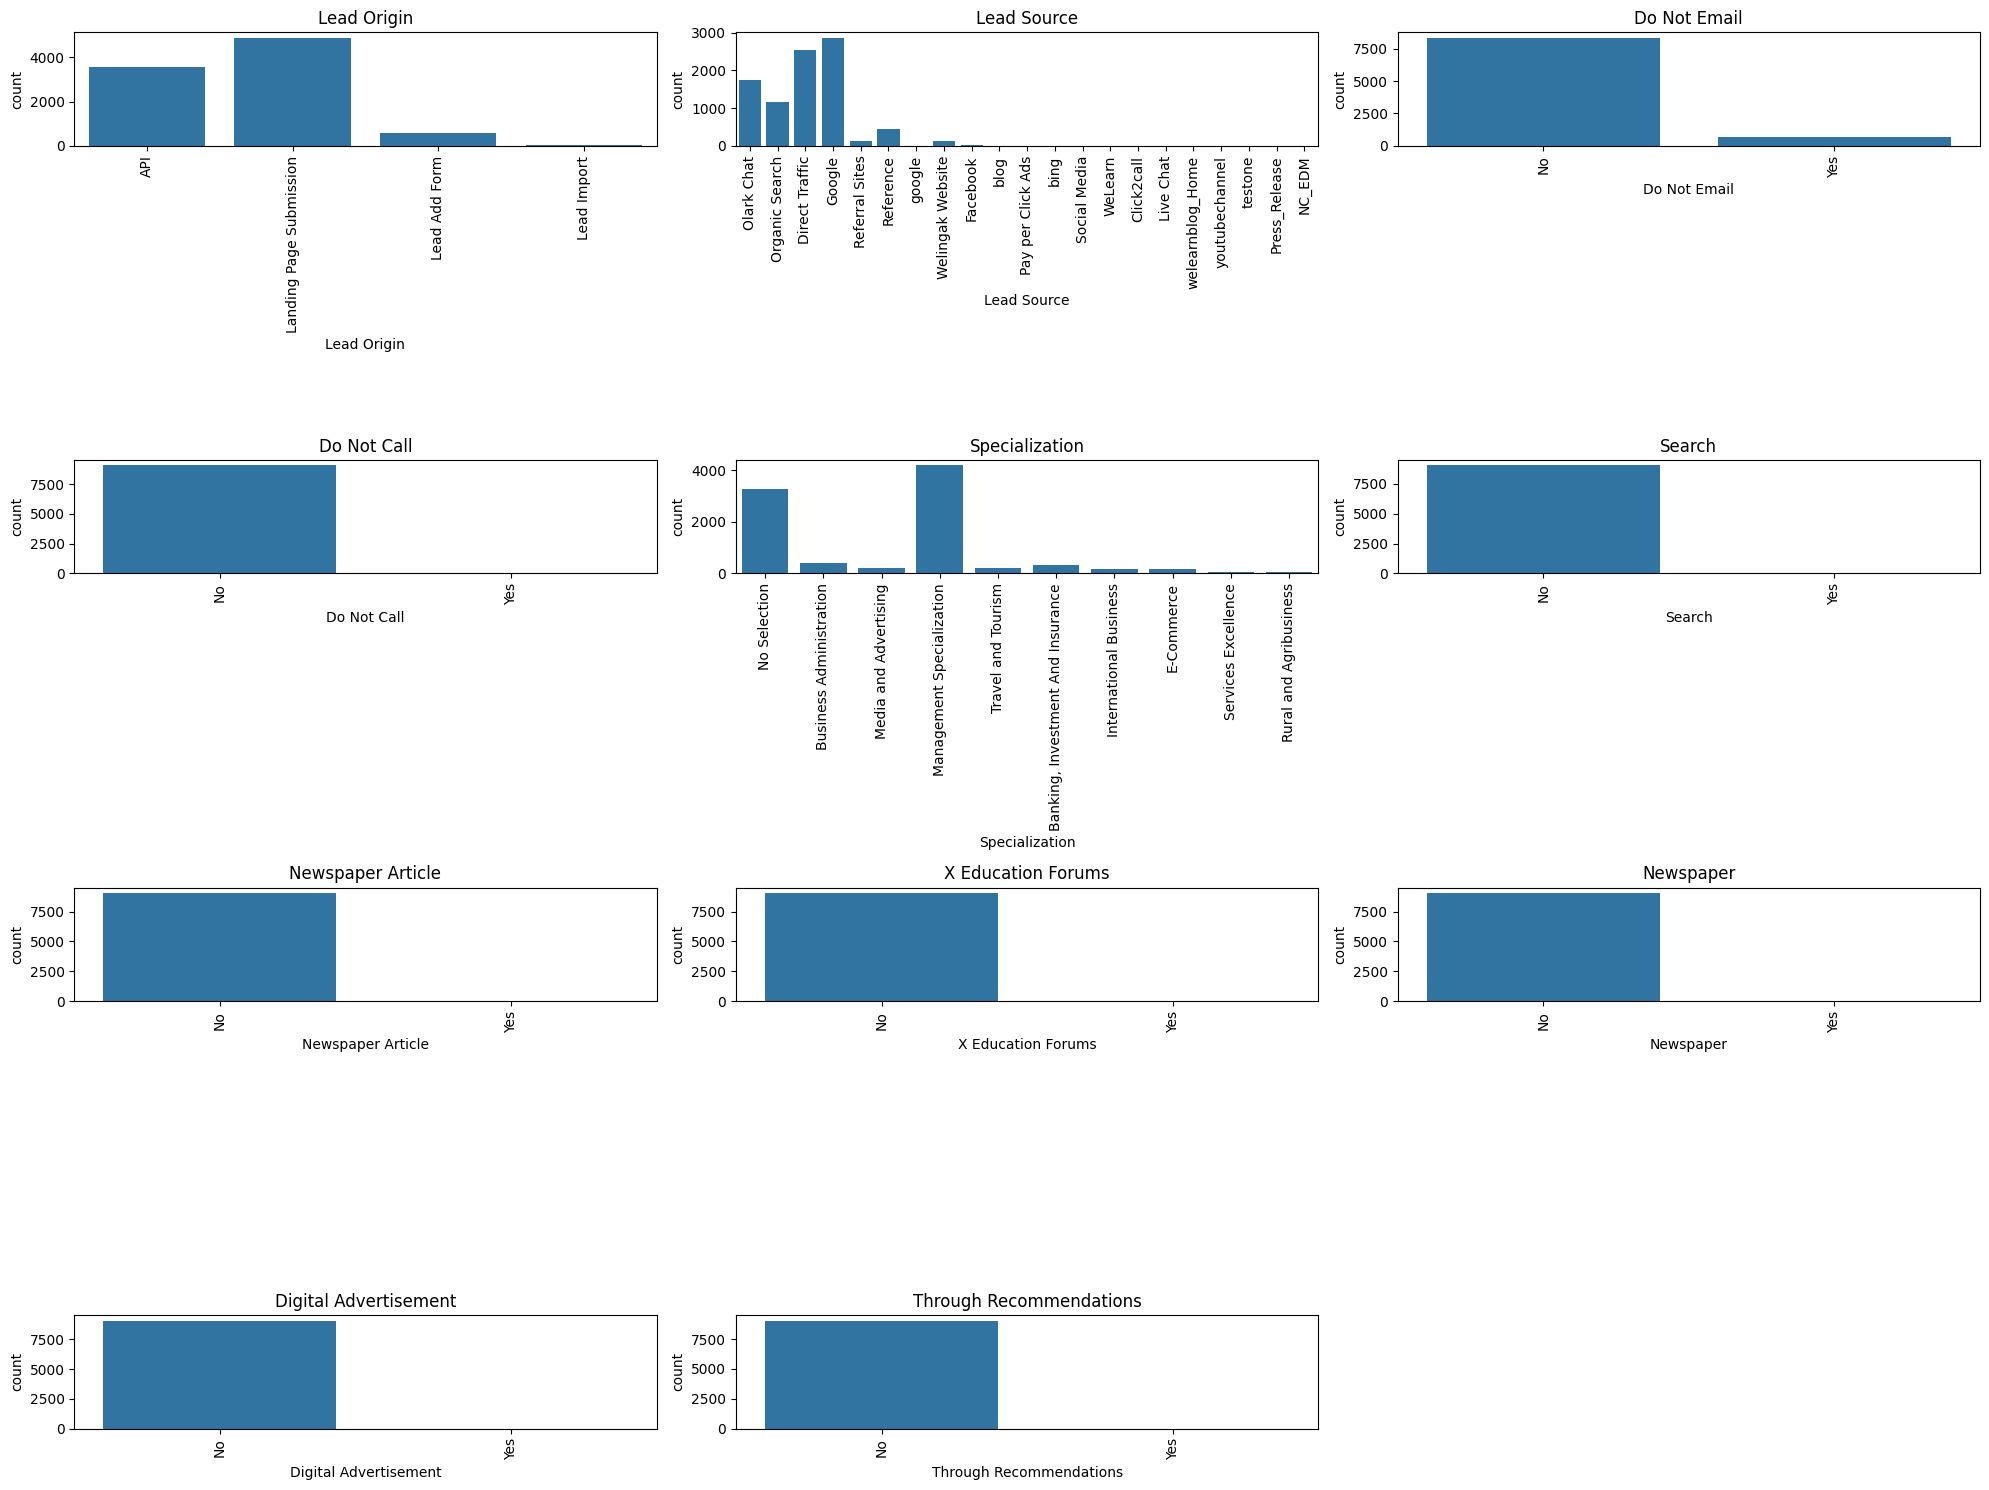

In [ ]:
#Plotting categorical variables for standardization and reducing redundant entries/

categorical_values =['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Specialization','Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                   'Digital Advertisement', 'Through Recommendations'
                  ]

a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 15))

for i in categorical_values:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=df)
    plt.xticks(rotation=90)
    c = c + 1

fig.tight_layout()
plt.show()


In [ ]:
#Ther is data imbalance in the following variables where majority of the entries are of same type. hence we can drop this column as its not relevant for modelling.
drop_list_update_2 = [ 'Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

df = df.drop(drop_list_update_2, axis=1)

In [ ]:
df.shape

(9074, 10)

In [ ]:
print( df['Lead Source'].unique() )
print('-'*100)
#Replacing the redundant values
#Google == google
#Others - These variables are very low in number. hence we can merge them
df['Lead Source'] = df['Lead Source'].replace ('google', 'Google')
df['Lead Source'] = df['Lead Source'].replace (['Welingak Website', 'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
                                              'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Others')


['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
----------------------------------------------------------------------------------------------------


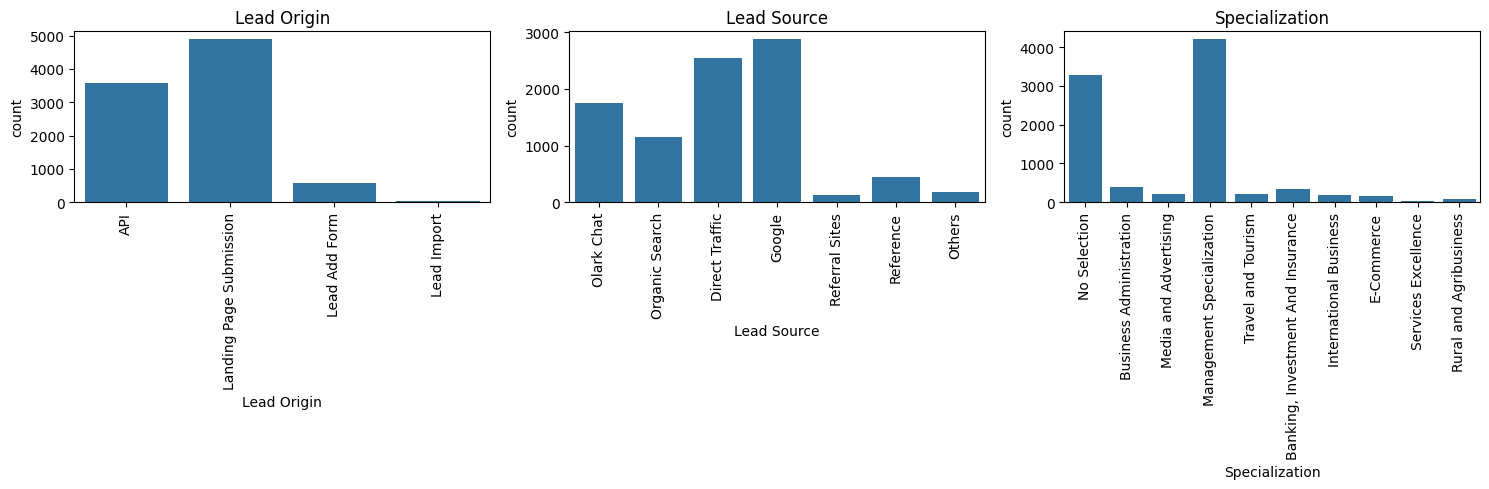

In [ ]:
#Plotting categorical variables for standardization and reducing redundant entries/

categorical_values =['Lead Origin', 'Lead Source', 'Specialization']

a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 5))

for i in categorical_values:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=df)
    plt.xticks(rotation=90)
    c = c + 1

fig.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Number                      9074 non-null   int64  
 2   Lead Origin                      9074 non-null   object 
 3   Lead Source                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 779.8+ KB


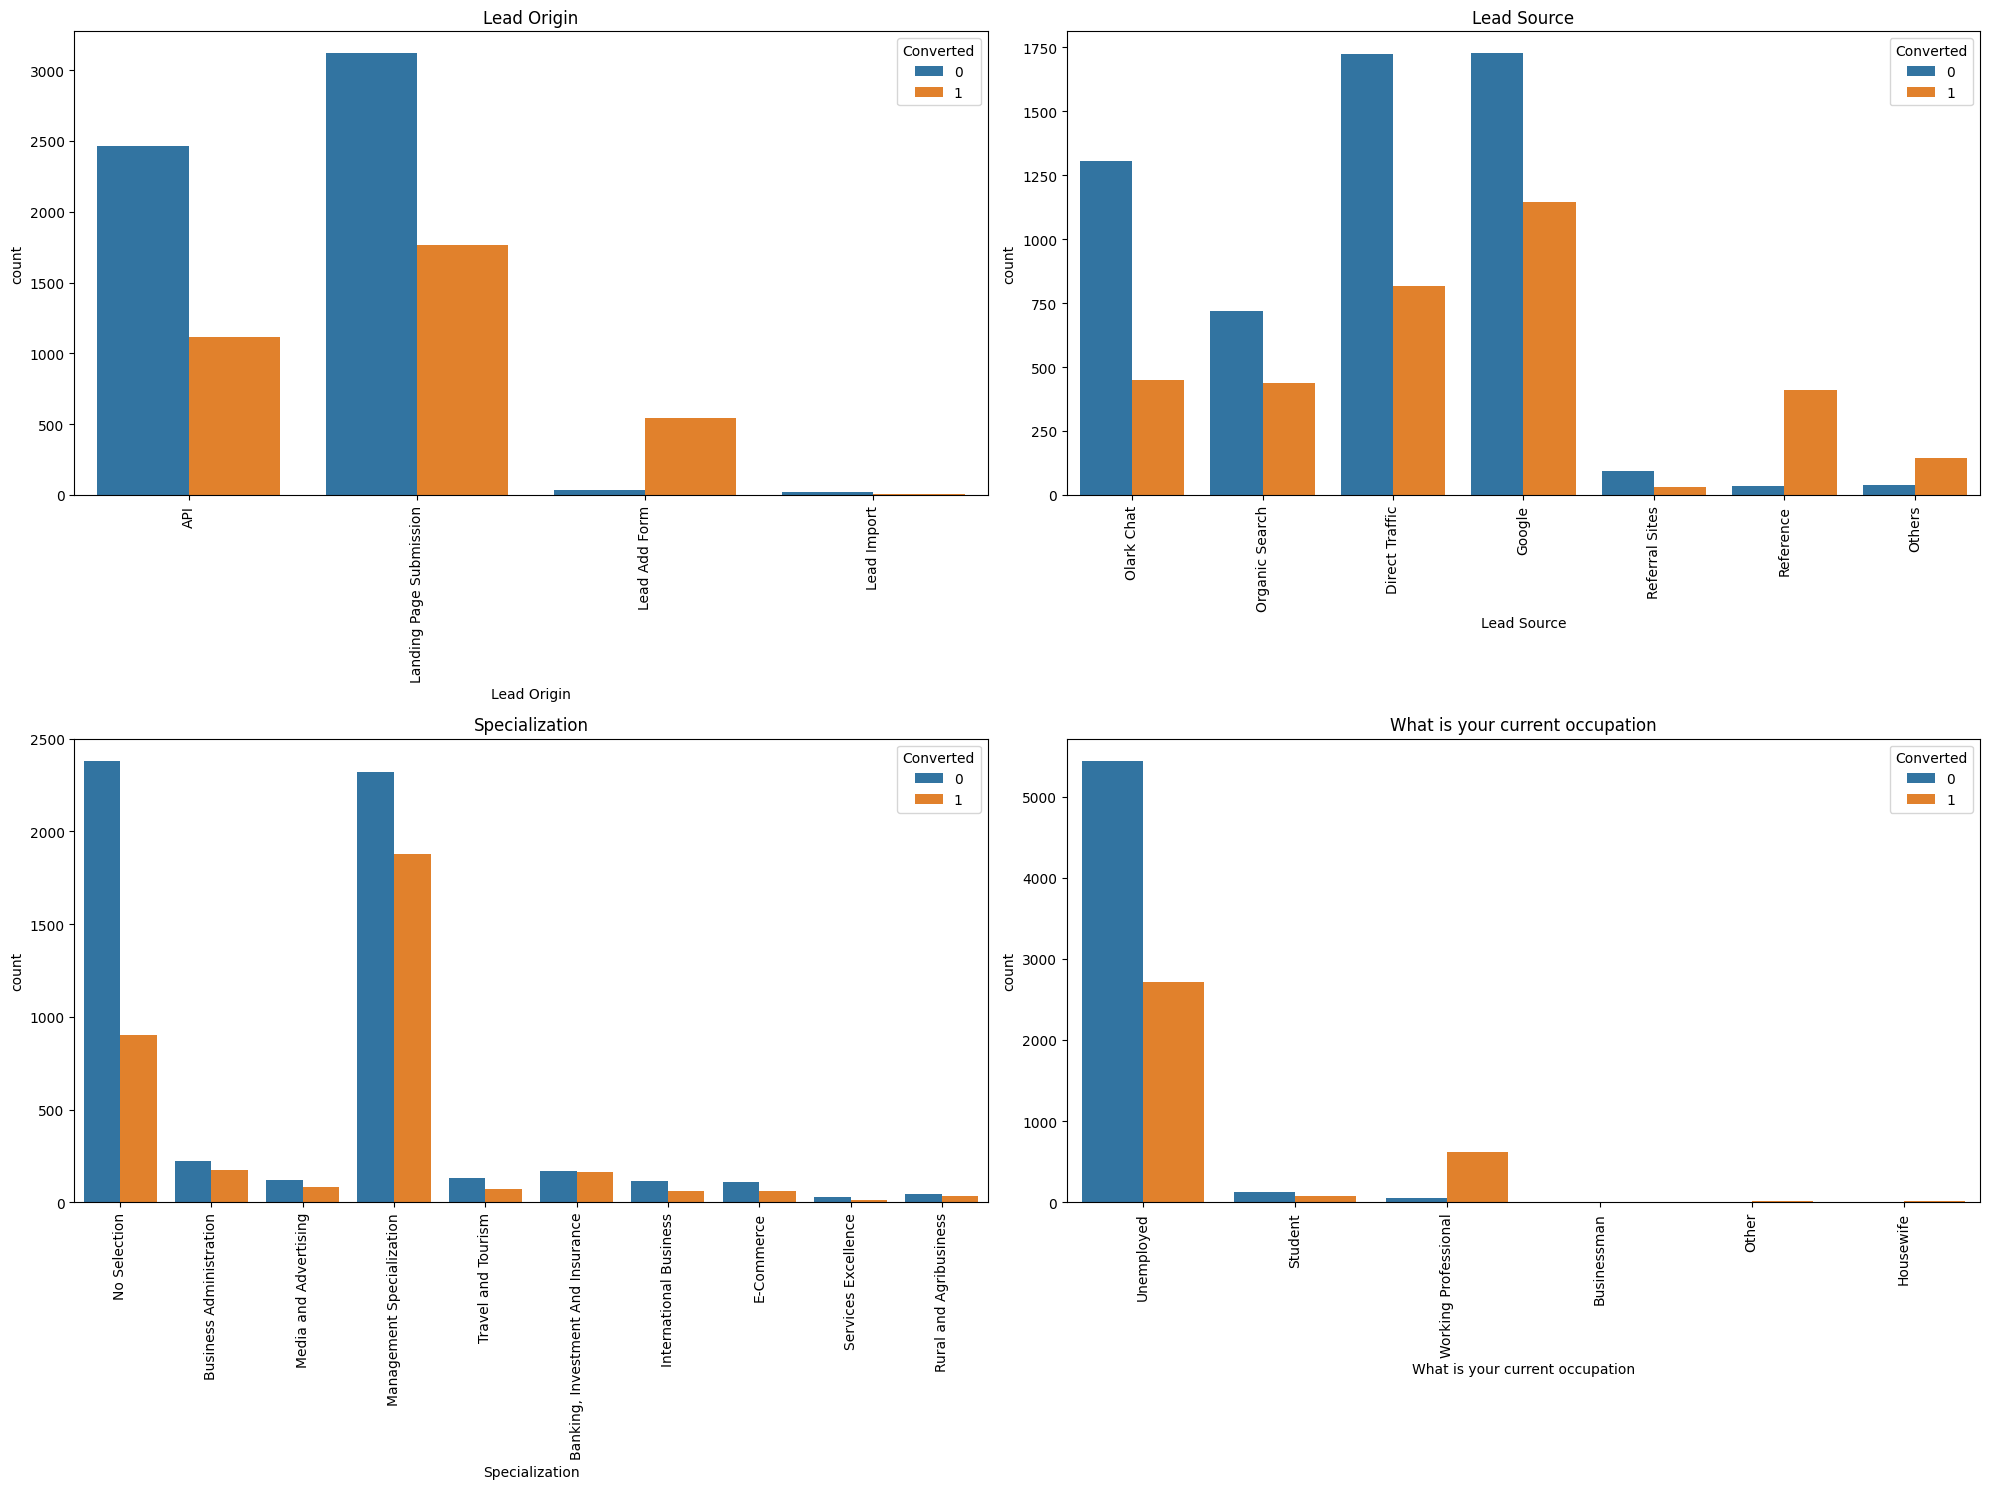

In [ ]:
# Bivariate analysis of categorial analysis

#Plotting categorical variables for standardization and reducing redundant entries/

categorical_values =['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation'
                    ]

a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 15))

for i in categorical_values:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=df, hue = 'Converted')
    plt.xticks(rotation=90)
    c = c + 1

fig.tight_layout()
plt.show()

# Insights

1.   Lead Origin: Leads coming from a "Landing Page Submission," about 36.17% of them end up converting into customers, while the remaining 63.83% do not convert. This indicates that while landing page submissions are effective in attracting leads, there's still room for improvement in converting these leads into customers.
2.   Lead Source: The data suggests that while around 60.08% of leads from Google did not convert, approximately 39.92% did convert. This indicates that Google is a significant source of leads, but there is still potential to improve conversion rates by optimizing strategies targeting leads from this platform.
3. Specialization: The provided data indicates that among leads with a management specialization, approximately 44.70% ended up converting into customers, while the remaining 55.30% did not convert. This suggests that while there is some success in converting leads with a management specialization, there may be opportunities to further enhance conversion rates within this group.
4. Current occupation: The data indicates that 33.29% of unemployed leads convert into customers, while 66.71% do not. This suggests that while there is some potential in targeting unemployed individuals, the conversion rate is relatively low, highlighting a need for tailored strategies or support to better engage and convert this demographic.



In [ ]:
df.groupby('What is your current occupation')['Converted'].value_counts(normalize = True)*100

What is your current occupation  Converted
Businessman                      1             62.500000
                                 0             37.500000
Housewife                        1            100.000000
Other                            1             60.000000
                                 0             40.000000
Student                          0             64.077670
                                 1             35.922330
Unemployed                       0             66.711607
                                 1             33.288393
Working Professional             1             91.875923
                                 0              8.124077
Name: proportion, dtype: float64

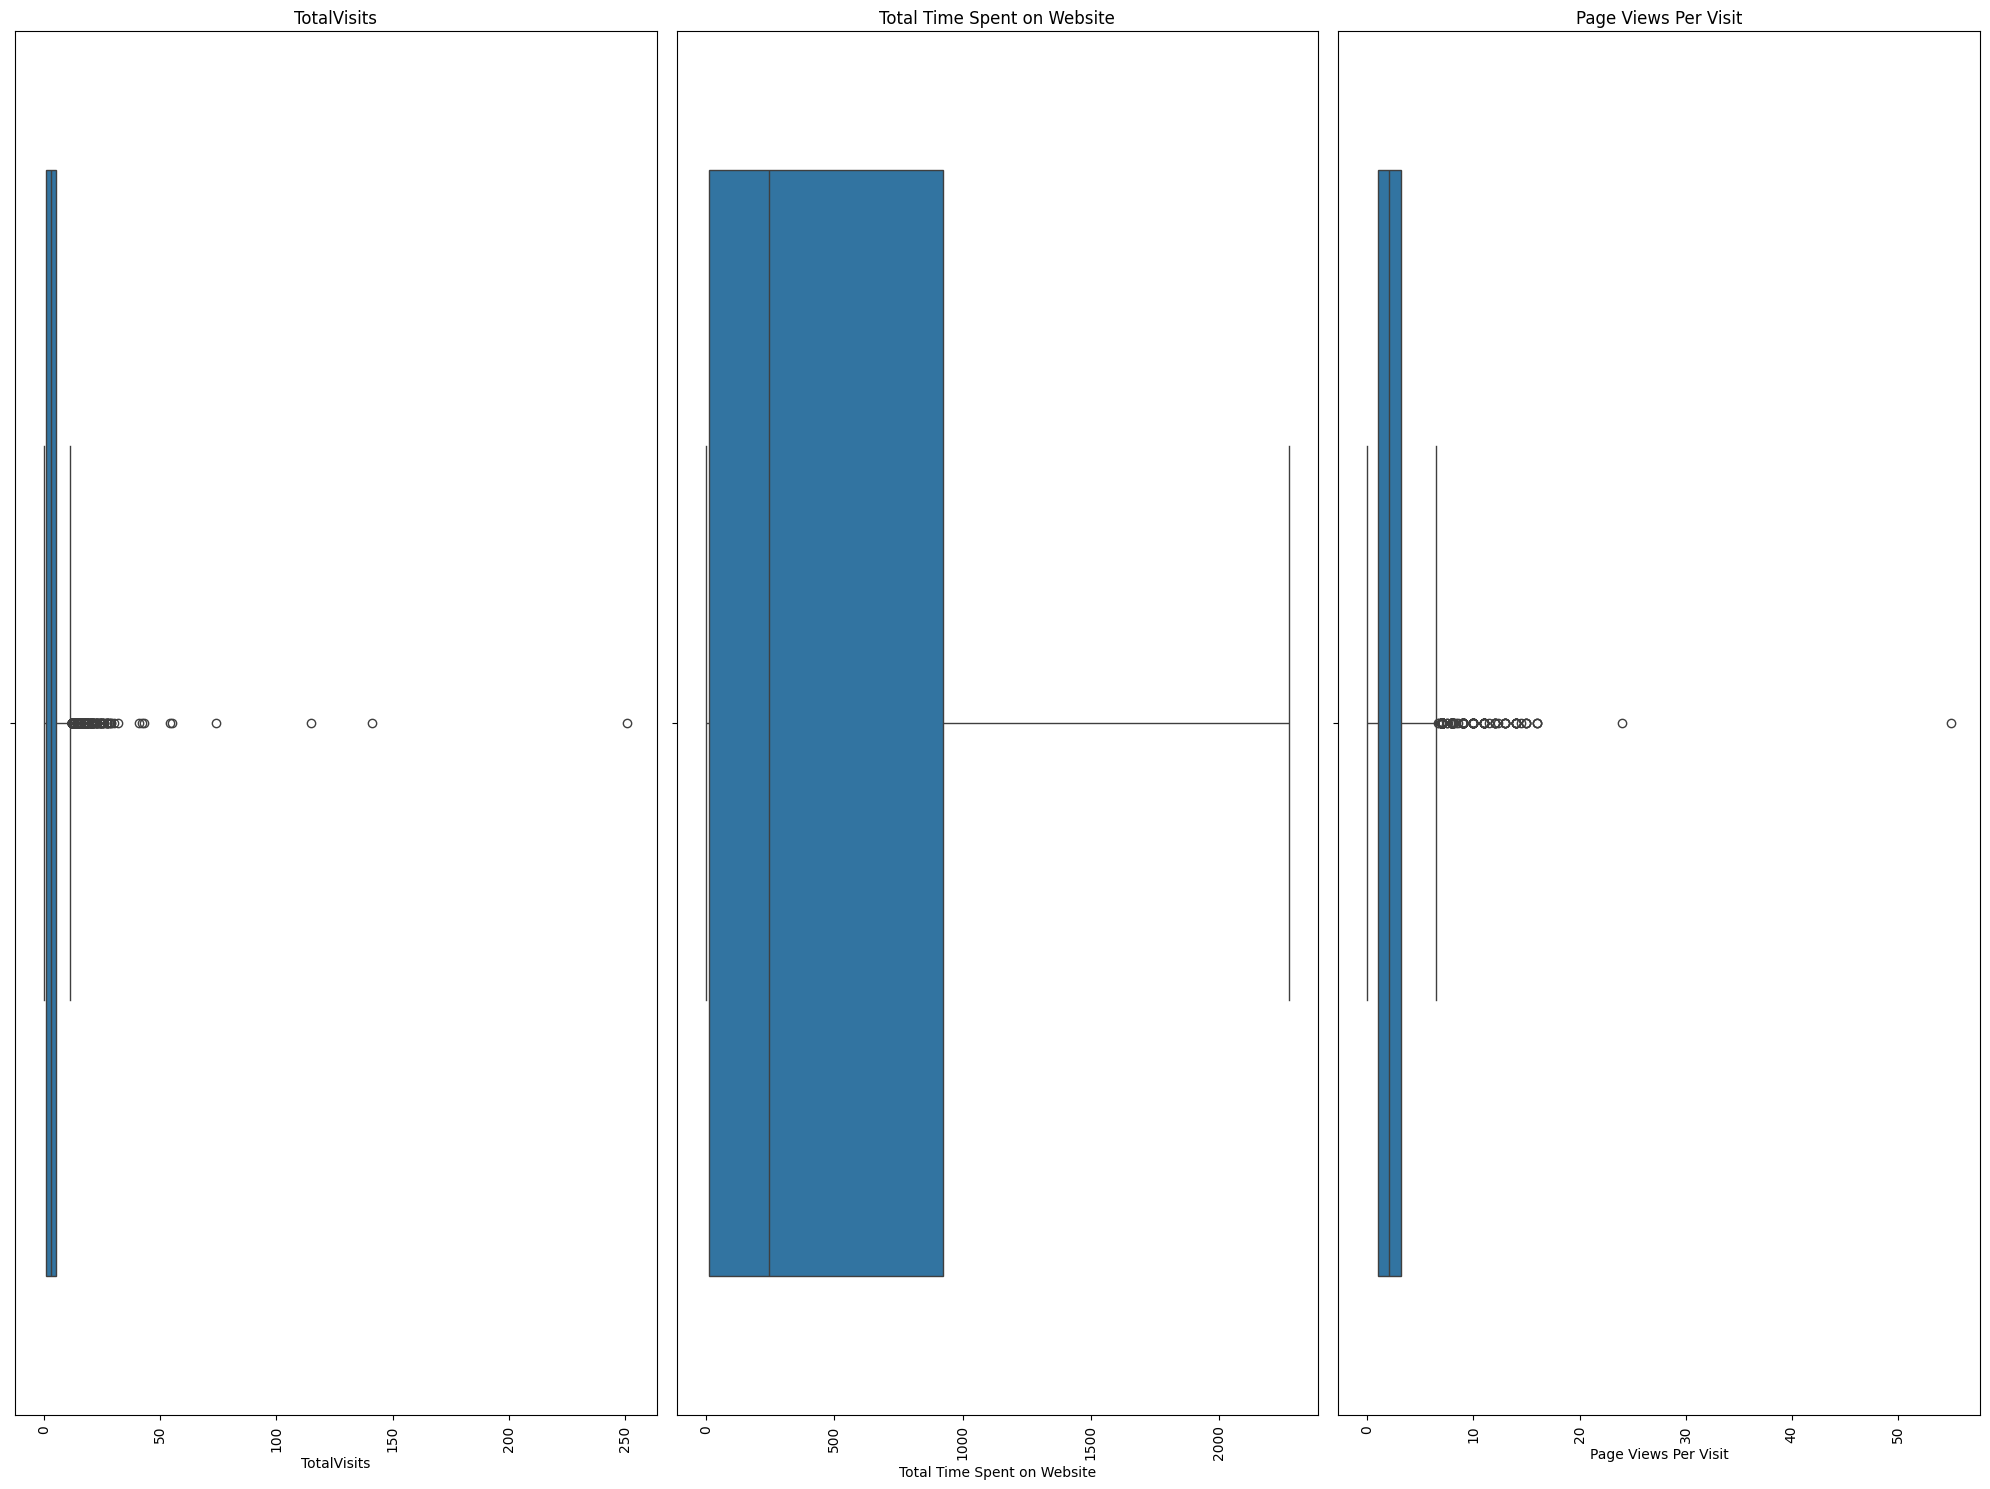

In [ ]:
# Univariate analysis of continuous variables

categorical_values = [ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 15))

for i in categorical_values:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.boxplot(x=i, data=df, orient = 'h')
    plt.xticks(rotation=90)
    c = c + 1

fig.tight_layout()
plt.show()

In [ ]:
# Defining function for calculating upper & lower bound, then capping the outliers
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [ ]:
# Checking outliers for numerical variables other than target variable
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF
Outlier_treatment(df,capping_cols)

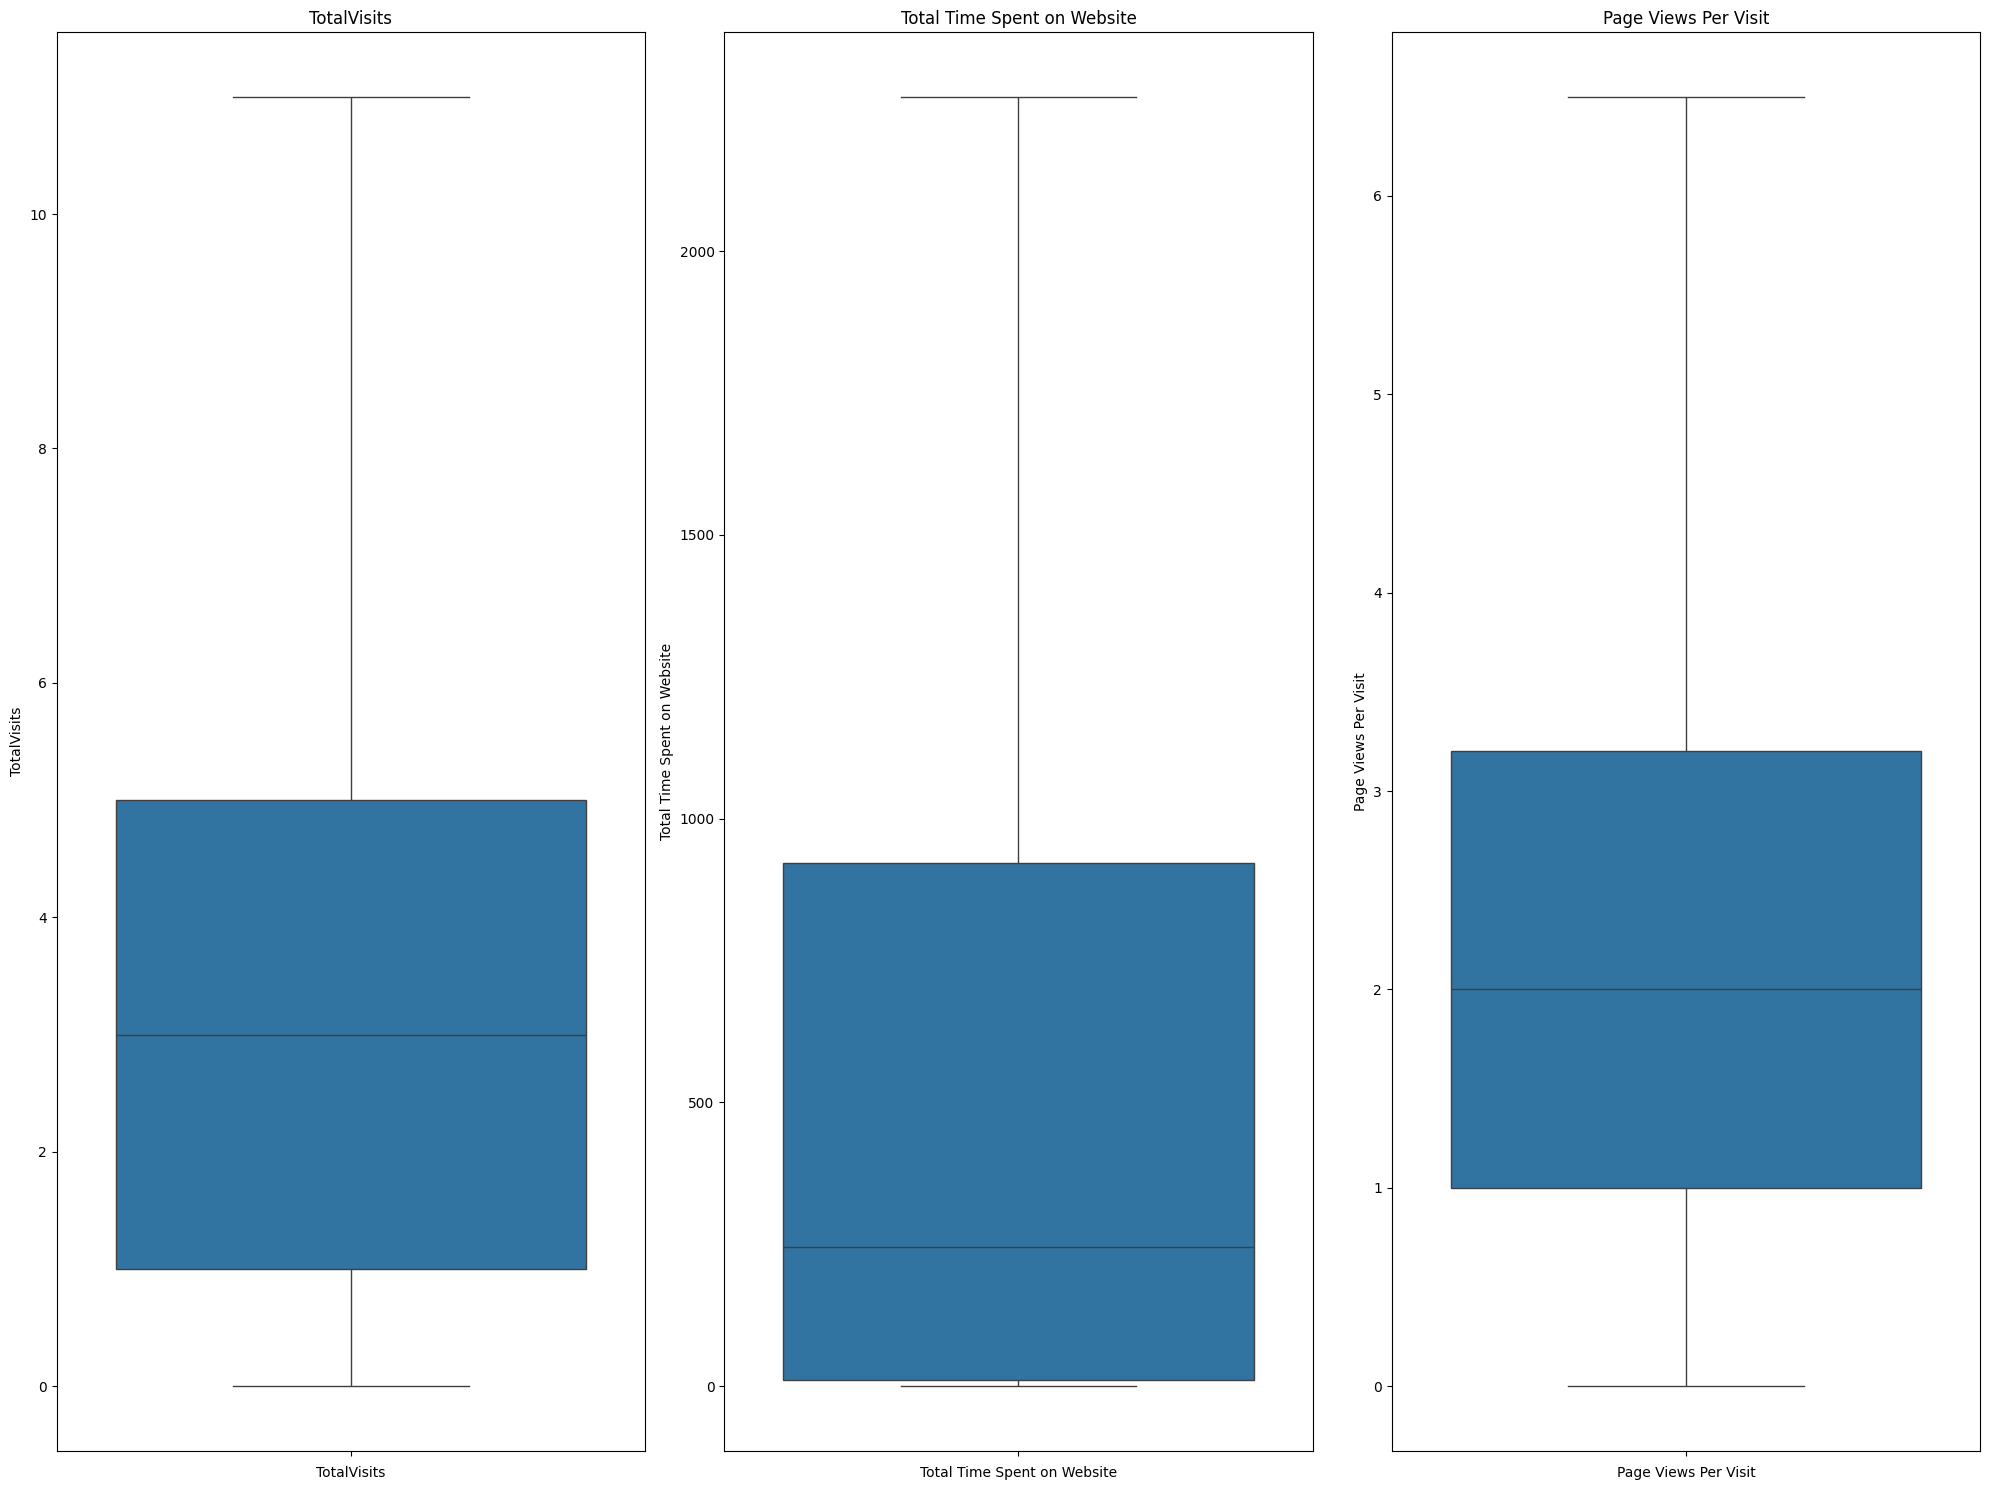

In [ ]:
# Univariate analysis of continuous variables

categorical_values = [ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 15))

for i in categorical_values:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.boxplot(y=i, data=df, orient = 'h')
    plt.xticks(rotation=90)
    c = c + 1

fig.tight_layout()
plt.show()

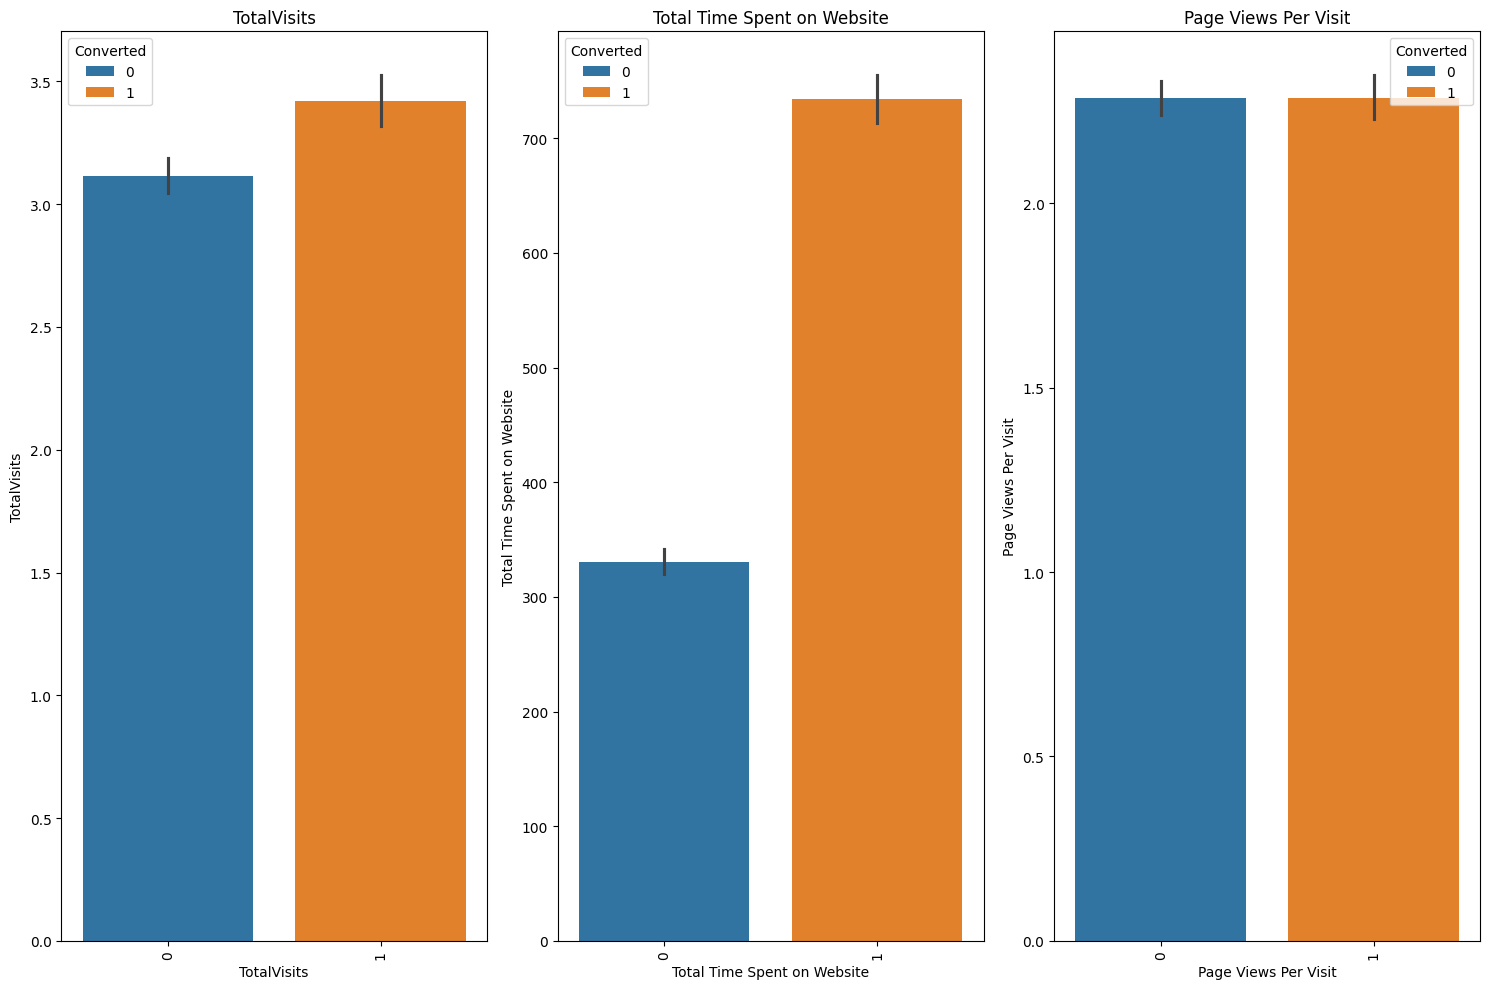

In [ ]:
# Biivariate analysis of continuous variables

categorical_values = [ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10 ))

for i in categorical_values:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.barplot(x='Converted', y=i, hue='Converted', data=df)  # Use hue parameter
    plt.xticks(rotation=90)
    c = c + 1

fig.tight_layout()
plt.show()



# Insights

1.   This slight difference suggests that there's a small increase in the average number of visits for leads who eventually converted, indicating a potential trend towards higher engagement among converting leads.
2.   Leads who did not convert (Converted=0) spent approximately 330 seconds (or about 5.5 minutes) on the website, whereas those who did convert (Converted=1) spent significantly more time, around 734 seconds (or about 12.2 minutes). This suggests a substantial difference in engagement levels between converting and non-converting leads, with converting leads spending notably more time on the website.
3. On average, both converting (Converted=1) and non-converting (Converted=0) leads have a similar number of page views per visit, with converting leads having a slightly higher average of approximately 2.29 page views per visit compared to 2.29 for non-converting leads. This suggests that there's not a significant difference in the average number of pages viewed per visit between converting and non-converting leads.









In [ ]:
df.groupby('Converted')['TotalVisits'].mean()


Converted
0    3.115091
1    3.420670
Name: TotalVisits, dtype: float64

In [ ]:
df.groupby('Converted')['Page Views Per Visit'].mean()

Converted
0    2.285168
1    2.286737
Name: Page Views Per Visit, dtype: float64

In [ ]:
df.groupby('Converted')['Total Time Spent on Website'].mean()

Converted
0    330.007803
1    733.859389
Name: Total Time Spent on Website, dtype: float64

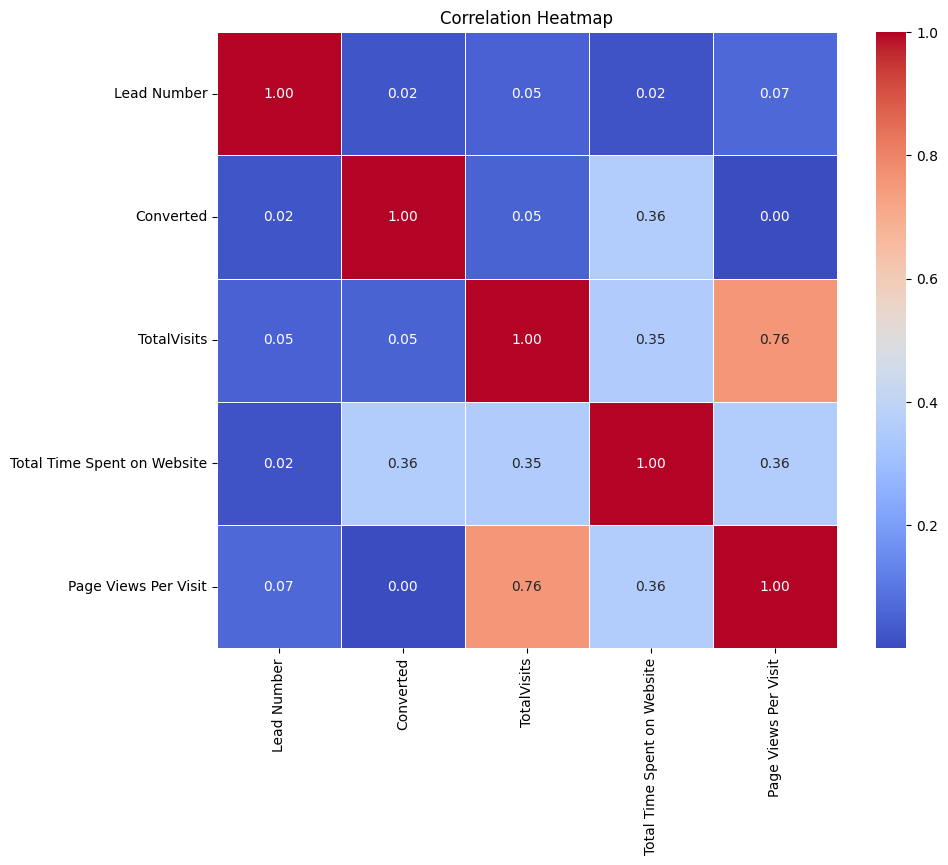

                             Lead Number  Converted  TotalVisits  \
Lead Number                     1.000000   0.022830     0.047544   
Converted                       0.022830   1.000000     0.051452   
TotalVisits                     0.047544   0.051452     1.000000   
Total Time Spent on Website     0.018360   0.359261     0.354607   
Page Views Per Visit            0.065523   0.000415     0.755206   

                             Total Time Spent on Website  Page Views Per Visit  
Lead Number                                     0.018360              0.065523  
Converted                                       0.359261              0.000415  
TotalVisits                                     0.354607              0.755206  
Total Time Spent on Website                     1.000000              0.359009  
Page Views Per Visit                            0.359009              1.000000  


In [ ]:
# Correlation between all the variables in the dataset

numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print(correlation)


# Insights

1.   There is a moderate positive correlation (correlation coefficient = 0.3546) between the total number of visits and the total time spent on the website, indicating that leads who visit the website more often tend to spend more time on it.
2.   There is a strong positive correlation (correlation coefficient = 0.7552) between the total number of visits and the average page views per visit, suggesting that leads who visit the website more often tend to view more pages per visit.




In [ ]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

# Conversion rate
The overall conversion rate of 37.86% indicates that slightly more than one-third of all leads are converting into customers. This suggests a reasonably effective lead conversion process

In [ ]:
df.isnull().sum()

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Specialization                     0
What is your current occupation    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Number                      9074 non-null   int64  
 2   Lead Origin                      9074 non-null   object 
 3   Lead Source                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 779.8+ KB


In [ ]:
# Create dummy variables for the categorical variables

df = pd.get_dummies(df, columns=[
    'Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation'
], drop_first = True, dtype=int)

In [ ]:
df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,Specialization_Media and Advertising,Specialization_No Selection,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Number                                           9074 non-null   int64  
 2   Converted                                             9074 non-null   int64  
 3   TotalVisits                                           9074 non-null   float64
 4   Total Time Spent on Website                           9074 non-null   int64  
 5   Page Views Per Visit                                  9074 non-null   float64
 6   Lead Origin_Landing Page Submission                   9074 non-null   int64  
 7   Lead Origin_Lead Add Form                             9074 non-null   int64  
 8   Lead Origin_Lead Import                               9074 non-

In [ ]:
# Drop 'Prospect ID' as it is not needed for modeling
df.drop(['Prospect ID'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   int64  
 6   Lead Origin_Lead Add Form                             9074 non-null   int64  
 7   Lead Origin_Lead Import                               9074 non-null   int64  
 8   Lead Source_Google                                    9074 non-

In [ ]:
# Splitting the data into features and target
X = df.drop('Converted', axis=1)
y = df['Converted']

In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=47)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6351, 27)
(2723, 27)
(6351,)
(2723,)


In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Convert the numpy arrays back to DataFrames for viewing
X_train_standard_df = pd.DataFrame(X_train, columns=X.columns)
X_test_standard_df = pd.DataFrame(X_test, columns=X.columns)
X_train_standard_df.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Media and Advertising,Specialization_No Selection,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,-0.232259,-1.118389,-0.883305,-1.247423,-1.076105,-0.255784,-0.06159,-0.682443,2.024132,-0.379357,...,-0.151772,1.314569,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149
1,-1.265583,-1.118389,-0.883305,-1.247423,-1.076105,-0.255784,-0.06159,-0.682443,2.024132,-0.379357,...,-0.151772,1.314569,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149
2,-1.456176,-0.424442,-0.432337,-0.149039,0.929277,-0.255784,-0.06159,-0.682443,-0.494039,-0.379357,...,-0.151772,-0.760705,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149
3,-0.053463,-1.118389,-0.883305,-1.247423,-1.076105,-0.255784,-0.06159,-0.682443,2.024132,-0.379357,...,-0.151772,1.314569,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149
4,-0.543261,-1.118389,-0.883305,-1.247423,-1.076105,-0.255784,-0.06159,-0.682443,2.024132,-0.379357,...,-0.151772,1.314569,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149


In [ ]:
X_test_standard_df.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Media and Advertising,Specialization_No Selection,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,-0.383144,-1.118389,-0.883305,-1.247423,-1.076105,-0.255784,-0.06159,-0.682443,2.024132,-0.379357,...,-0.151772,1.314569,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149
1,0.659241,0.963450,-0.423134,2.047729,0.929277,-0.255784,-0.06159,1.465324,-0.494039,-0.379357,...,-0.151772,-0.760705,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149
2,0.071818,-0.424442,-0.597999,-0.149039,-1.076105,-0.255784,-0.06159,1.465324,-0.494039,-0.379357,...,-0.151772,1.314569,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149
3,0.142473,-0.077469,-0.789430,-0.423635,-1.076105,-0.255784,-0.06159,1.465324,-0.494039,-0.379357,...,-0.151772,1.314569,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149
4,1.661490,0.269504,-0.366072,0.949345,0.929277,-0.255784,-0.06159,1.465324,-0.494039,-0.379357,...,-0.151772,-0.760705,-0.096003,-0.071162,-0.151772,-0.030751,-0.041654,-0.149586,0.325965,-0.276149


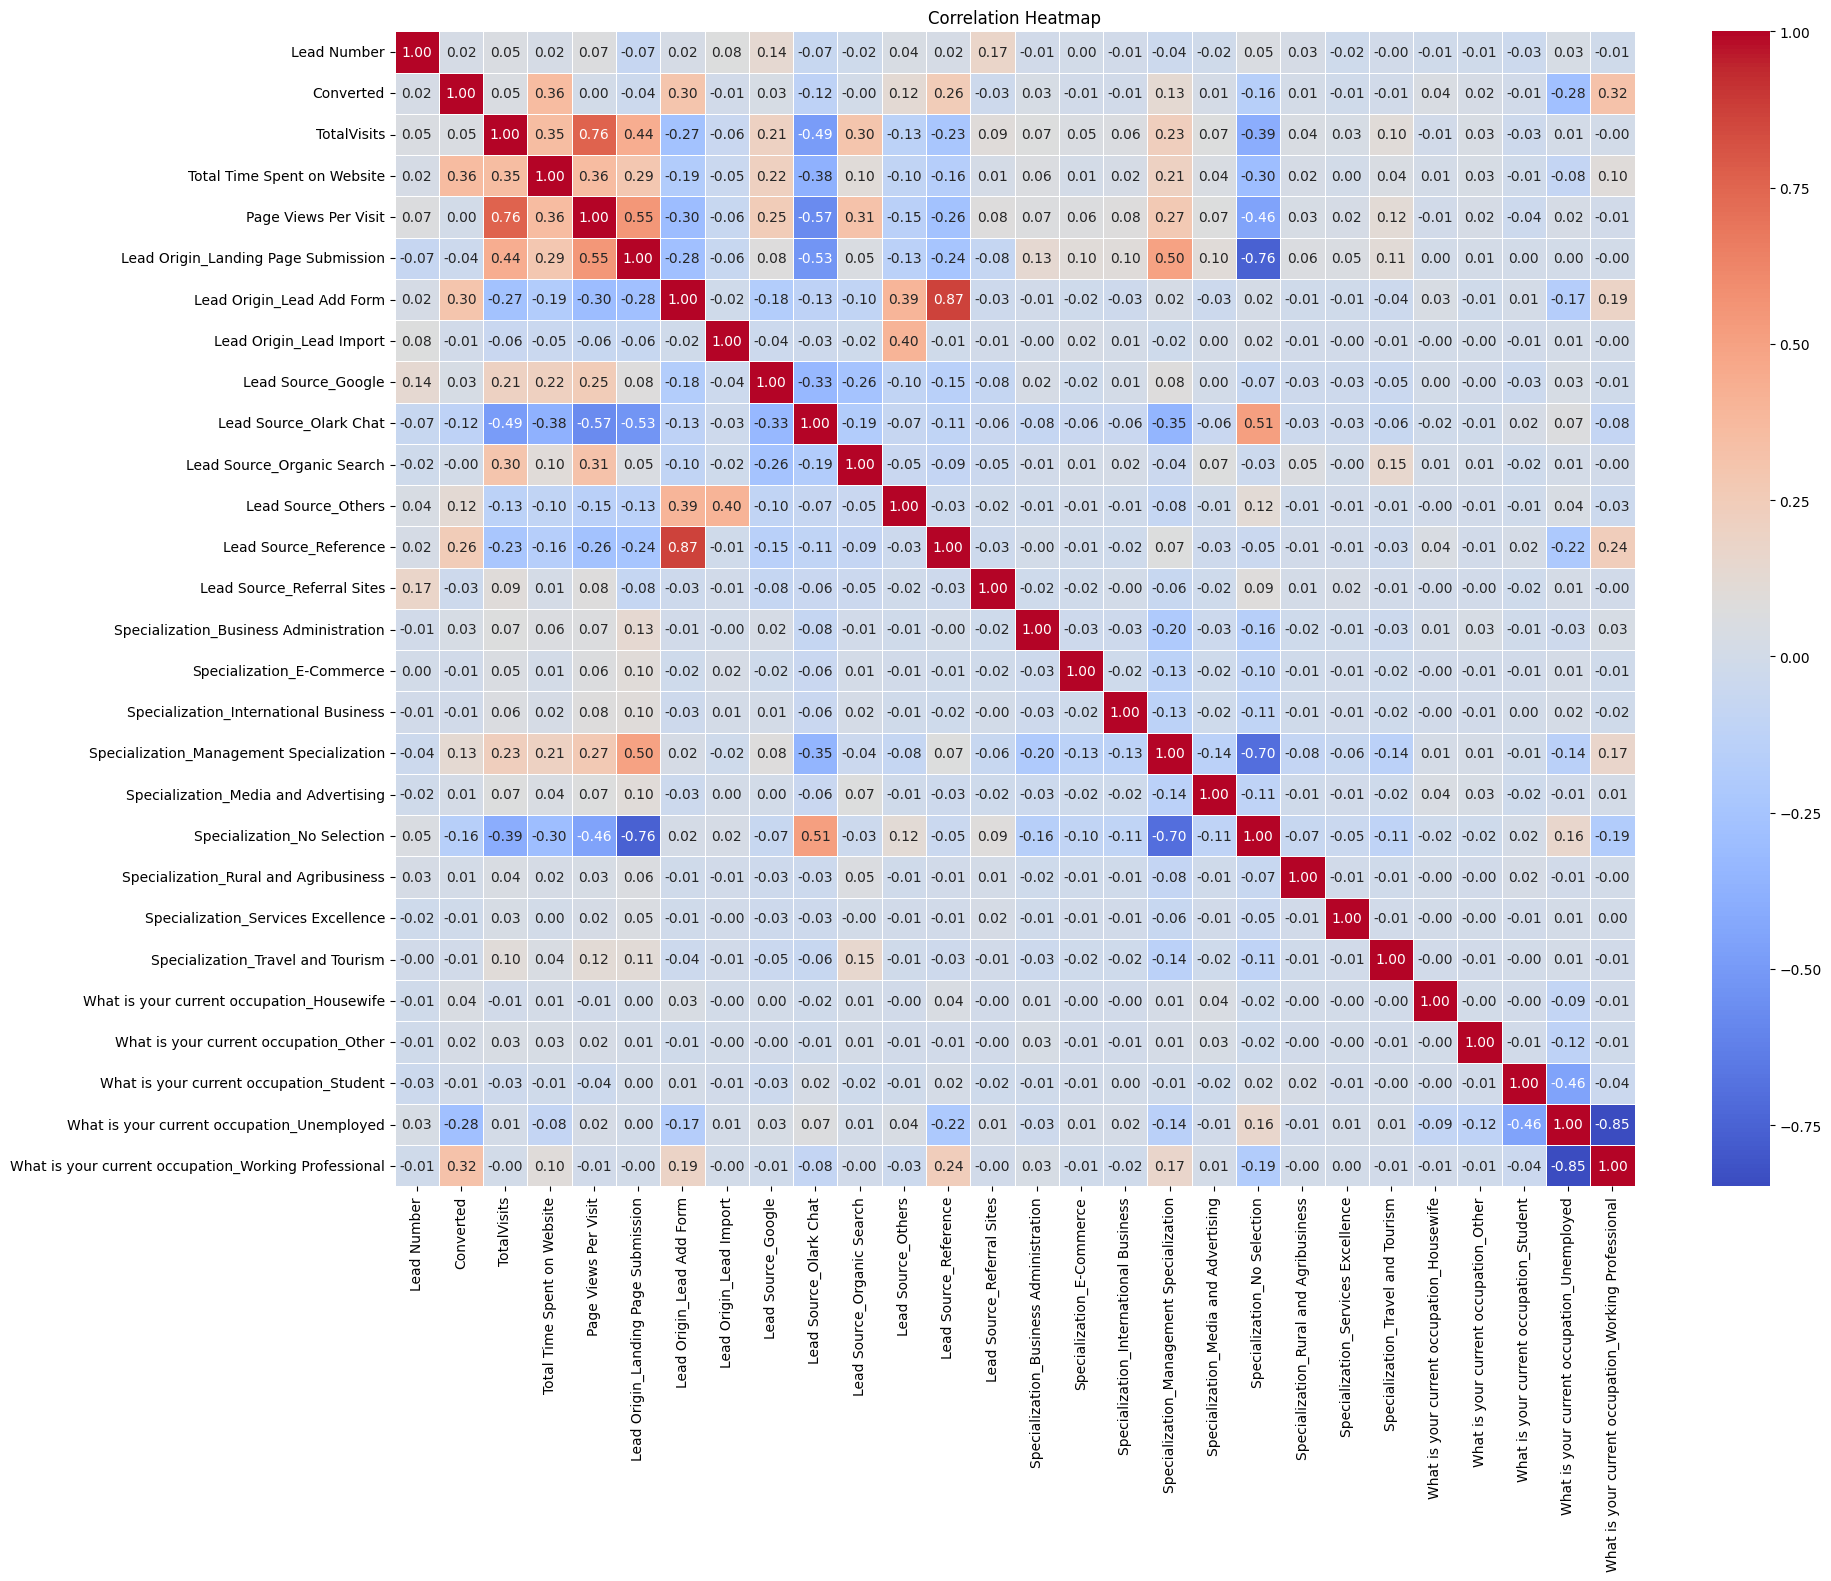

In [ ]:
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
X_train_standard_df = X_train_standard_df.drop(['Page Views Per Visit', 'Specialization_No Selection', 'Lead Origin_Lead Add Form'], axis = 1)

In [ ]:

X_test_standard_df = X_test_standard_df.drop(['Page Views Per Visit', 'Specialization_No Selection', 'Lead Origin_Lead Add Form'], axis = 1)

In [ ]:
X_train_standard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351 entries, 0 to 6350
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           6351 non-null   float64
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   float64
 3   Lead Origin_Landing Page Submission                   6351 non-null   float64
 4   Lead Origin_Lead Import                               6351 non-null   float64
 5   Lead Source_Google                                    6351 non-null   float64
 6   Lead Source_Olark Chat                                6351 non-null   float64
 7   Lead Source_Organic Search                            6351 non-null   float64
 8   Lead Source_Others                                    6351

In [ ]:
X_test_standard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           2723 non-null   float64
 1   TotalVisits                                           2723 non-null   float64
 2   Total Time Spent on Website                           2723 non-null   float64
 3   Lead Origin_Landing Page Submission                   2723 non-null   float64
 4   Lead Origin_Lead Import                               2723 non-null   float64
 5   Lead Source_Google                                    2723 non-null   float64
 6   Lead Source_Olark Chat                                2723 non-null   float64
 7   Lead Source_Organic Search                            2723 non-null   float64
 8   Lead Source_Others                                    2723

In [ ]:
X_train_standard_df.shape

(6351, 24)

In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_train_df = pd.DataFrame(y_train, columns=['Converted'])
y_train_df.head()

,Converted
0,1
1,0
2,0
3,0
4,0


In [ ]:
# Logistic regression model 1
logm1 = sm.GLM(y_train_df,(sm.add_constant(X_train_standard_df)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3043.4
Date:                Mon, 20 May 2024   Deviance:                       6086.9
Time:                        17:26:36   Pearson chi2:                 6.90e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5086     15.601     -0.033      0.974     -31.085      30.068
Lead Number                                             -0.0178      0.033     -0.537      0.591      -0.083       0.047
TotalVisits                                              0.2223      0.041      5.472      0.000       0.143       0.302
Total Time Spent on Website                              1.0496      0.037     28.397      0.000       0.977       1.122
Lead Origin_Landing Page Submission                     -0.2650      0.058     -4.586      0.000      -0.378      -0.152
Lead Origin_Lead Import                                 -0.1782      0.034     -5.223      0.000      -0.245      -0.111
Lead Source_Google                                       0.1431      0.041      3.471      0.001       0.062       0.224
Lead Source_Olark Chat                                   0.4340      0.055      7.860      0.000       0.326       0.542
Lead Source_Organic Search                               0.0306      0.039      0.793      0.428      -0.045       0.106
Lead Source_Others                                       0.5897      0.043     13.600      0.000       0.505       0.675
Lead Source_Reference                                    0.8983      0.054     16.653      0.000       0.793       1.004
Lead Source_Referral Sites                              -0.0330      0.036     -0.908      0.364      -0.104       0.038
Specialization_Business Administration                   0.1009      0.037      2.752      0.006       0.029       0.173
Specialization_E-Commerce                                0.1097      0.033      3.319      0.001       0.045       0.175
Specialization_International Business                    0.0799      0.033      2.394      0.017       0.014       0.145
Specialization_Management Specialization                 0.3025      0.052      5.840      0.000       0.201       0.404
Specialization_Media and Advertising                     0.0793      0.034      2.309      0.021       0.012       0.147
Specialization_Rural and Agribusiness                    0.0793      0.032      2.479      0.013       0.017       0.142
Specialization_Services Excellence                       0.0193      0.033      0.577      0.564      -0.046       0.085
Specialization_Travel and Tourism                        0.0724      0.035      2.089      0.037       0.004       0.140
What is your current occupation_Housewife                0.7450    507.322      0.001      0.999    -993.588     995.078
What is your current occupation_Other                    0.0784      0.068      1.150      0.250      -0.055       0.212
What is your current occupation_Student                  0

In [ ]:
# Feature Selection Using RFE
logreg = LogisticRegression()

rfe = RFE(logreg, step = 15)
rfe = rfe.fit(X_train_standard_df, y_train_df)

In [ ]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True,  True])

In [ ]:
list(zip(X_train_standard_df.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 2),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_E-Commerce', False, 2),
 ('Specialization_International Business', False, 2),
 ('Specialization_Management Specialization', True, 1),
 ('Specialization_Media and Advertising', False, 2),
 ('Specialization_Rural and Agribusiness', False, 2),
 ('Specialization_Services Excellence', False, 2),
 ('Specialization_Travel and Tourism', False, 2),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 2),
 ('What is your current occupation_Student', False, 2),
 

In [ ]:
col = X_train_standard_df.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Specialization_Management Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [ ]:
X_train_standard_df.columns[~rfe.support_]

Index(['Lead Number', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Specialization_Business Administration',
       'Specialization_E-Commerce', 'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student'],
      dtype='object')

In [ ]:
# Logistic regression model 2
X_train_sm = sm.add_constant(X_train_standard_df[col])
logm2 = sm.GLM(y_train_df,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.2
Date:                Mon, 20 May 2024   Deviance:                       6114.4
Time:                        17:26:37   Pearson chi2:                 6.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3017
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5087     15.675     -0.032      0.974     -31.230      30.213
TotalVisits                                              0.2428      0.039      6.236      0.000       0.166       0.319
Total Time Spent on Website                              1.0559      0.037     28.682      0.000       0.984       1.128
Lead Origin_Landing Page Submission                     -0.1323      0.047     -2.815      0.005      -0.224      -0.040
Lead Origin_Lead Import                                 -0.1678      0.034     -4.996      0.000      -0.234      -0.102
Lead Source_Google                                       0.1293      0.035      3.687      0.000       0.061       0.198
Lead Source_Olark Chat                                   0.4284      0.051      8.428      0.000       0.329       0.528
Lead Source_Others                                       0.5855      0.043     13.723      0.000       0.502       0.669
Lead Source_Reference                                    0.9146      0.053     17.406      0.000       0.812       1.018
Specialization_Management Specialization                 0.1490      0.039      3.846      0.000       0.073       0.225
What is your current occupation_Housewife                0.7070    509.722      0.001      0.999    -998.330     999.744
What is your current occupation_Unemployed              -0.0275      0.059     -0.467      0.640      -0.143       0.088
What is your current occupation_Working Professional     0.7504      0.070     10.666      0.000       0.613       0.888
========================================================================================================================
"""

In [ ]:
X_train_standard_df = X_train_standard_df.drop('What is your current occupation_Housewife', axis=1)

In [ ]:
X_test_standard_df = X_test_standard_df.drop('What is your current occupation_Housewife', axis=1)
X_test_standard_df.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,-0.383144,-1.118389,-0.883305,-1.076105,-0.06159,-0.682443,2.024132,-0.379357,-0.145124,-0.2211,...,-0.138185,-0.921362,-0.151772,-0.096003,-0.071162,-0.151772,-0.041654,-0.149586,0.325965,-0.276149
1,0.659241,0.963450,-0.423134,0.929277,-0.06159,1.465324,-0.494039,-0.379357,-0.145124,-0.2211,...,-0.138185,1.085350,-0.151772,-0.096003,-0.071162,-0.151772,-0.041654,-0.149586,0.325965,-0.276149
2,0.071818,-0.424442,-0.597999,-1.076105,-0.06159,1.465324,-0.494039,-0.379357,-0.145124,-0.2211,...,-0.138185,-0.921362,-0.151772,-0.096003,-0.071162,-0.151772,-0.041654,-0.149586,0.325965,-0.276149
3,0.142473,-0.077469,-0.789430,-1.076105,-0.06159,1.465324,-0.494039,-0.379357,-0.145124,-0.2211,...,-0.138185,-0.921362,-0.151772,-0.096003,-0.071162,-0.151772,-0.041654,-0.149586,0.325965,-0.276149
4,1.661490,0.269504,-0.366072,0.929277,-0.06159,1.465324,-0.494039,-0.379357,-0.145124,-0.2211,...,-0.138185,1.085350,-0.151772,-0.096003,-0.071162,-0.151772,-0.041654,-0.149586,0.325965,-0.276149


In [ ]:
col1 = ['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Specialization_Business Administration',
       'Specialization_Management Specialization',
       'What is your current occupation_Working Professional']

In [ ]:
# Logistic regression model 3

X_train_sm = sm.add_constant(X_train_standard_df[col1])
logm3 = sm.GLM(y_train_df,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3061.8
Date:                Mon, 20 May 2024   Deviance:                       6123.5
Time:                        17:26:37   Pearson chi2:                 6.83e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3007
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5272      0.034    -15.686      0.000      -0.593      -0.461
TotalVisits                                              0.2396      0.039      6.154      0.000       0.163       0.316
Total Time Spent on Website                              1.0539      0.037     28.645      0.000       0.982       1.126
Lead Origin_Landing Page Submission                     -0.1463      0.049     -3.009      0.003      -0.242      -0.051
Lead Origin_Lead Import                                 -0.1684      0.034     -5.001      0.000      -0.234      -0.102
Lead Source_Google                                       0.1285      0.035      3.669      0.000       0.060       0.197
Lead Source_Olark Chat                                   0.4262      0.051      8.385      0.000       0.327       0.526
Lead Source_Others                                       0.5843      0.043     13.693      0.000       0.501       0.668
Lead Source_Reference                                    0.9118      0.053     17.335      0.000       0.809       1.015
Specialization_Business Administration                   0.0475      0.034      1.395      0.163      -0.019       0.114
Specialization_Management Specialization                 0.1661      0.041      4.039      0.000       0.086       0.247
What is your current occupation_Working Professional     0.7711      0.050     15.512      0.000       0.674       0.869
========================================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.190676
1    0.190676
2    0.102424
3    0.190676
4    0.190676
5    0.282993
6    0.276074
7    0.230031
8    0.413373
9    0.088161
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1, 1)
y_train_pred.shape

(6351, 1)

In [ ]:
y_train_pred_df = pd.DataFrame(y_train_pred, columns=['Converted_prob'])

y_train_pred_df.head()

,Converted_prob
0,0.190676
1,0.190676
2,0.102424
3,0.190676
4,0.190676


In [ ]:
y_train_df.shape

(6351, 1)

In [ ]:
# Creating a dataframe with the actual Converted and the predicted probabilities
# Concatenate the two DataFrames along the columns
y_train_pred_final = pd.concat([y_train_df, y_train_pred_df], axis=1)
y_train_pred_final.head()


,Converted,Converted_prob
0,1,0.190676
1,0,0.190676
2,0,0.102424
3,0,0.190676
4,0,0.190676


In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,1,0.190676,0
1,0,0.190676,0
2,0,0.102424,0
3,0,0.190676,0
4,0,0.190676,0


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3510  467]
 [ 922 1452]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.781294284364667


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_standard_df[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train_standard_df[col1].values, i) for i in range(X_train_standard_df[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.44
2,Lead Origin_Landing Page Submission,2.37
9,Specialization_Management Specialization,1.65
0,TotalVisits,1.60
7,Lead Source_Reference,1.54
6,Lead Source_Others,1.37
1,Total Time Spent on Website,1.30
4,Lead Source_Google,1.29
3,Lead Origin_Lead Import,1.22
8,Specialization_Business Administration,1.15


# Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.611625947767481

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8825748051294946

In [ ]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.1174251948705054


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.7566440854611777


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7919675090252708


# Plotting the ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

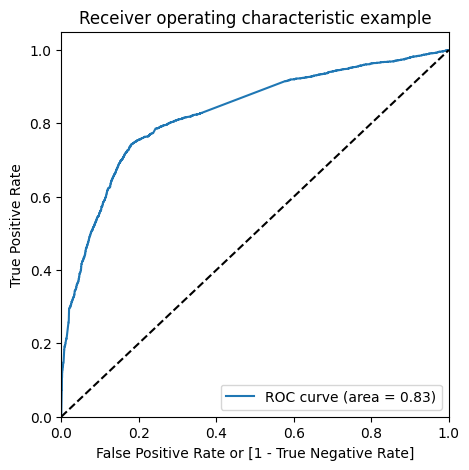

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.190676,0,1,1,0,0,0,0,0,0,0,0
1,0,0.190676,0,1,1,0,0,0,0,0,0,0,0
2,0,0.102424,0,1,1,0,0,0,0,0,0,0,0
3,0,0.190676,0,1,1,0,0,0,0,0,0,0,0
4,0,0.190676,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373799  1.000000  0.000000
0.1   0.1  0.402141  0.989469  0.051546
0.2   0.2  0.722091  0.820556  0.663314
0.3   0.3  0.785860  0.751474  0.806387
0.4   0.4  0.790584  0.692923  0.848881
0.5   0.5  0.781294  0.611626  0.882575
0.6   0.6  0.767438  0.515586  0.917777
0.7   0.7  0.747756  0.411963  0.948202
0.8   0.8  0.726657  0.315080  0.972341
0.9   0.9  0.678003  0.148273  0.994217


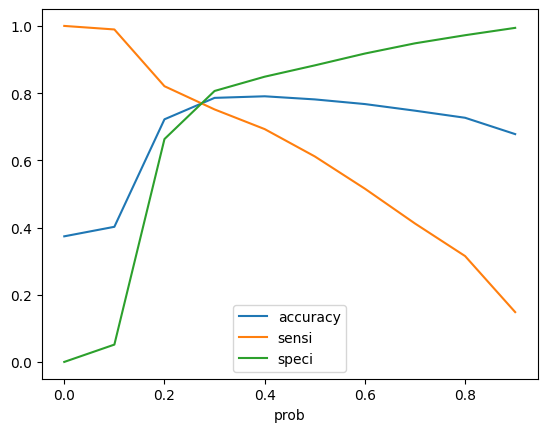

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.190676,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.190676,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.102424,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.190676,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.190676,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7858604944103291

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3207,  770],
       [ 590, 1784]])

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.611625947767481

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8825748051294946

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1174251948705054


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.7566440854611777


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7919675090252708


# Precision and Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3510,  467],
       [ 922, 1452]])

In [ ]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7566440854611777

In [ ]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.611625947767481

In [ ]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7566440854611777

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.611625947767481

# Precision and recall tradeoff

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    1
 6347    0
 6348    0
 6349    1
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

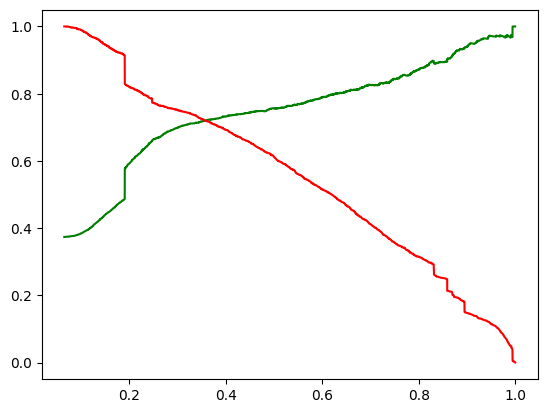

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
X_test_standard_df = X_test_standard_df[col1]
X_test_standard_df.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Specialization_Business Administration,Specialization_Management Specialization,What is your current occupation_Working Professional
0,-1.118389,-0.883305,-1.076105,-0.06159,-0.682443,2.024132,-0.145124,-0.2211,-0.20702,-0.921362,-0.276149
1,0.963450,-0.423134,0.929277,-0.06159,1.465324,-0.494039,-0.145124,-0.2211,-0.20702,1.085350,-0.276149
2,-0.424442,-0.597999,-1.076105,-0.06159,1.465324,-0.494039,-0.145124,-0.2211,-0.20702,-0.921362,-0.276149
3,-0.077469,-0.789430,-1.076105,-0.06159,1.465324,-0.494039,-0.145124,-0.2211,-0.20702,-0.921362,-0.276149
4,0.269504,-0.366072,0.929277,-0.06159,1.465324,-0.494039,-0.145124,-0.2211,-0.20702,1.085350,-0.276149


In [ ]:
X_test_standard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           2723 non-null   float64
 1   Total Time Spent on Website                           2723 non-null   float64
 2   Lead Origin_Landing Page Submission                   2723 non-null   float64
 3   Lead Origin_Lead Import                               2723 non-null   float64
 4   Lead Source_Google                                    2723 non-null   float64
 5   Lead Source_Olark Chat                                2723 non-null   float64
 6   Lead Source_Others                                    2723 non-null   float64
 7   Lead Source_Reference                                 2723 non-null   float64
 8   Specialization_Business Administration                2723

In [ ]:
X_test_sm = sm.add_constant(X_test_standard_df)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

0    0.190676
1    0.228117
2    0.144819
3    0.130740
4    0.209969
5    0.975699
6    0.233678
7    0.190676
8    0.610999
9    0.137171
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
0,0.190676
1,0.228117
2,0.144819
3,0.130740
4,0.209969


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 5486 to 3925
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Converted  2723 non-null   int64
dtypes: int64(1)
memory usage: 42.5 KB


In [ ]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,5486,0.190676
1,0,2862,0.228117
2,0,4308,0.144819
3,0,4156,0.130740
4,0,435,0.209969


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead Number', 'Converted', 'Converted_Prob']]

In [ ]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,5486,0,0.190676
1,2862,0,0.228117
2,4308,0,0.144819
3,4156,0,0.130740
4,435,0,0.209969


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [ ]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,5486,0,0.190676,0
1,2862,0,0.228117,0
2,4308,0,0.144819,0
3,4156,0,0.130740,0
4,435,0,0.209969,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7939772309952259

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1385,  277],
       [ 284,  777]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7323279924599434

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8333333333333334